# Pymaceuticals Inc.

There is a positive(strong) correction (since value at 0.84) between the weight of the mouse and the average tumor volumes indicating maybe people’s weight affect the outcome of the drug regimen used.

The sex of the mice is almost the same with 0.51 Male and 0.49 Female, this shows that the study is somewhat equally distrubted.

Capomulin and Ramicane: These two drug regimens have lower mean and median tumor volumes compared to others, indicating potential effectiveness.

Ketapril, Naftisol, Placebo, and Stelasyn: These regimens have higher mean and median tumor volumes, suggesting they might be less effective.

Propriva: Although not as effective as Capomulin and Ramicane, Propriva shows a relatively lower mean tumor volume.

Consistency: The low values of Tumor Volume SEM for Capomulin and Ramicane indicate more reliable mean estimates.

These observations provide initial insights into the effectiveness of different drug regimens in controlling tumor growth. 

 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
metadata_results_complete=pd.merge(study_results, mouse_metadata, how="left", on= 'Mouse ID')
print(metadata_results_complete.shape)
metadata_results_complete.head()

# Display the data table for preview

(1893, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice.
mice_count=len(metadata_results_complete["Mouse ID"].unique())
mice_count

249

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_filter_series = metadata_results_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep= False)
duplicate_row_filter_series
duplicate_miceIDs = metadata_results_complete[duplicate_row_filter_series]['Mouse ID'].unique()
duplicate_miceIDs

array(['g989'], dtype=object)

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
bad_mice_filter_series =metadata_results_complete["Mouse ID"].isin(duplicate_miceIDs)
metadata_results_complete[bad_mice_filter_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = metadata_results_complete[~bad_mice_filter_series]
print(clean_mice_data.shape)
clean_mice_data.head()

(1880, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice in the clean DataFrame.
len(clean_mice_data['Mouse ID'].unique())

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = metadata_results_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = summary_stats.mean()
median_tumor_volume = summary_stats.median()
variance_tumor_volume = summary_stats.var()
std_dev_tumor_volume = summary_stats.std()
sem_tumor_volume = summary_stats.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance Tumor Volume': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = metadata_results_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = summary_stats.rename(columns ={
    'mean': 'mean',
    'median': 'median',
    'var': 'variance',
    'std': 'std',
    'sem': 'sem'
})

summary_stats

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

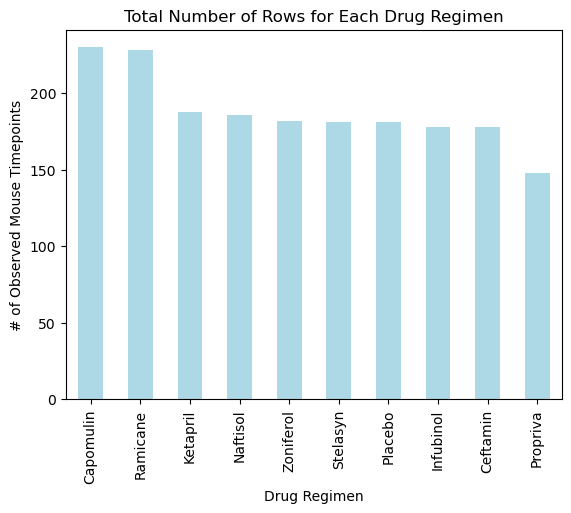

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows
drug_counts = clean_mice_data['Drug Regimen'].value_counts()

# Create a bar plot
drug_counts.plot(kind='bar', color='lightblue')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

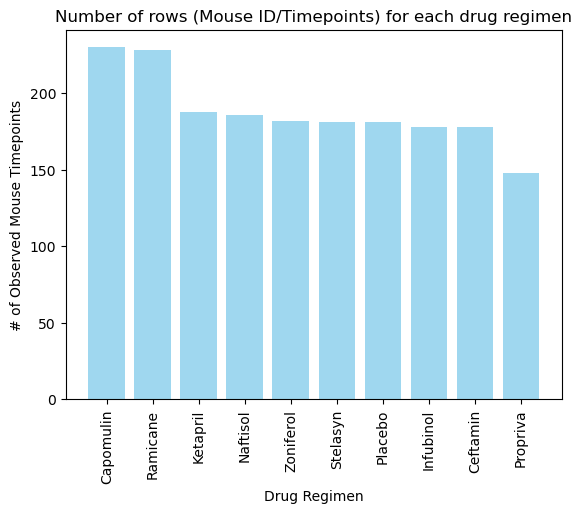

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mice_count= clean_mice_data["Drug Regimen"].value_counts()

x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a bar plot
plt.bar(x_axis, y_axis, color='skyblue', alpha=0.8, align='center')

# Add labels and title 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints") 
plt.xticks(rotation="vertical")
plt.title("Number of rows (Mouse ID/Timepoints) for each drug regimen")
plt.tight_layout
plt.show()


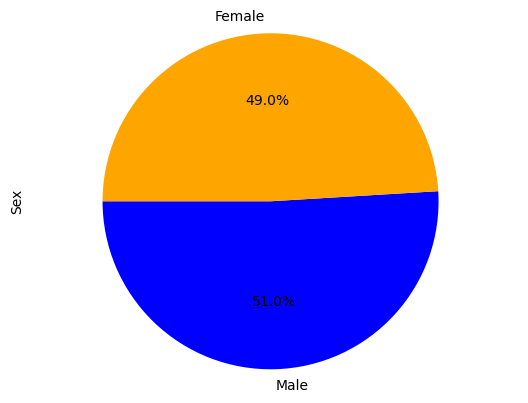

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sizes = clean_mice_data['Sex'].value_counts()

plt.pie(sizes, autopct='%1.1f%%', startangle=180, colors=['blue', 'orange'], labels=['Male', 'Female'])
plt.axis("equal")

# Move the title to the left of the x-axis
plt.ylabel('Sex', ha='center', va='center')

plt.show()

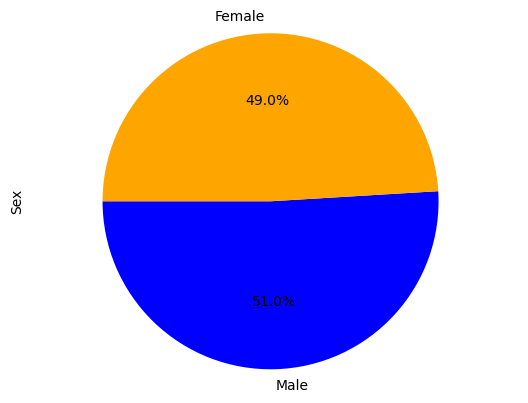

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
size = clean_mice_data['Sex'].value_counts()
colors =["blue", "orange"]
# Plot the pie chart
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis("equal")
plt.ylabel('Sex',ha='center', va='center' ) 
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mice_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
print(last_timepoint.shape)
last_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_mice_data, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
print(merged_data.shape)
merged_data.head()

(248, 2)
(248, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [55]:
# Put treatments into a list for for loop (and later for plot labels use each of this drugs  Capomulin, Ramicane, Infubinol, and Ceftamin
# List of promising drugs
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data as series (for plotting)
tumor_volume_data =[]

# Loop through each promising drug
for drug in promising_drugs:
    
    # Locate the rows which contain mice on this drug and get the tumor volumes (as series)
    tumor_volume_series = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add tumor volume series to ploting list
    tumor_volume_data.append(tumor_volume_series)
    
    #calculate IQR for this drug
    quartiles = tumor_volume_series.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine upper and lower bounds for outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Identify potential outliers for this drug
    outliers = tumor_volume_series.loc[(tumor_volume_series < lower_bound) | (tumor_volume_series > upper_bound)]
    
    # Print the outliers 
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


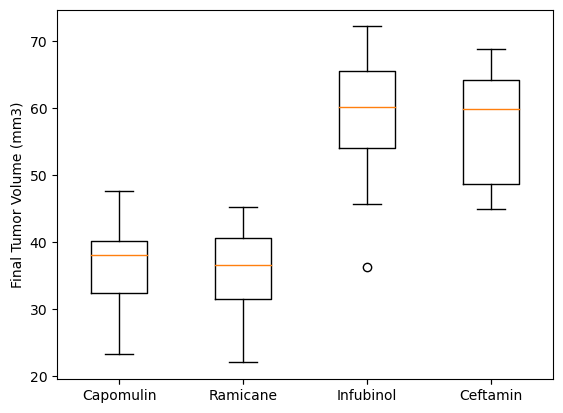

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_xticks(range(1, len(promising_drugs) + 1))
ax1.set_xticklabels(promising_drugs)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, labels=promising_drugs)
plt.show()

## Line and Scatter Plots

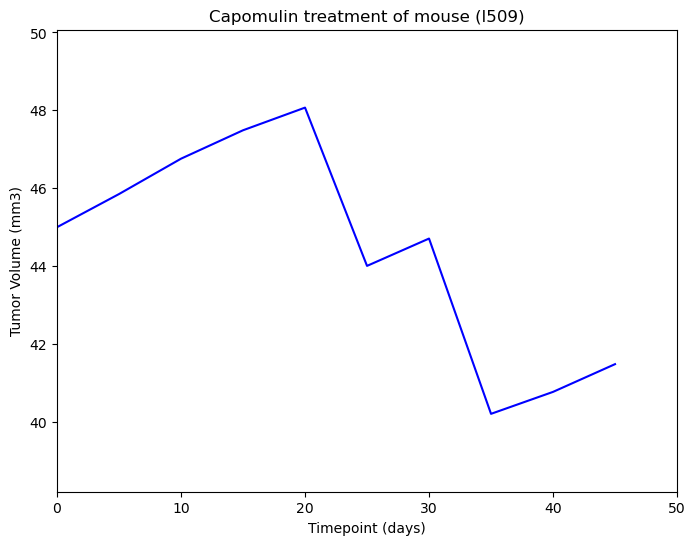

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
filtered_data = metadata_results_complete.loc[(metadata_results_complete["Mouse ID"] == "l509") & (metadata_results_complete["Drug Regimen"] == "Capomulin"),:]
filtered_data

# Sample data for mouse treated with Capomulin
timepoints = filtered_data["Timepoint"]
tumor_volumes = filtered_data["Tumor Volume (mm3)"]

# Plotting the line
plt.figure(figsize=(8, 6))
plt.plot(timepoints, tumor_volumes, color='blue', marker = '')

# Adding labels and title
plt.title('Capomulin treatment of mouse (l509)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(min(tumor_volumes) -2, max(tumor_volumes) + 2)

# Display the plot
plt.show()

In [67]:
updated_data = metadata_results_complete.loc[(metadata_results_complete["Drug Regimen"] == "Capomulin")]
updated_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [68]:
average_capomulin_tumor_volume =updated_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_capomulin_tumor_volume.head()


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [69]:
weight = updated_data.groupby('Mouse ID')['Weight (g)'].mean()
weight.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Weight (g), dtype: float64

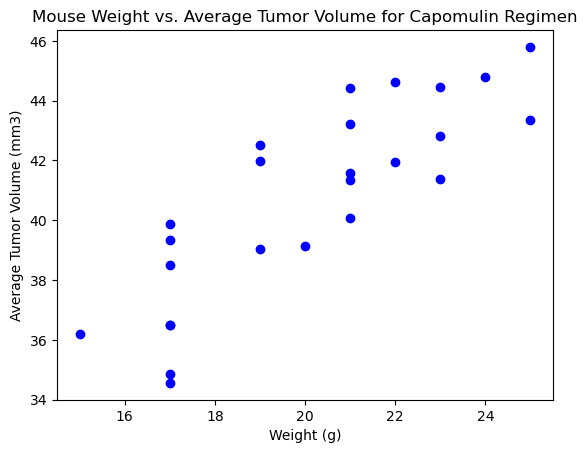

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, average_capomulin_tumor_volume, marker="o", facecolors='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

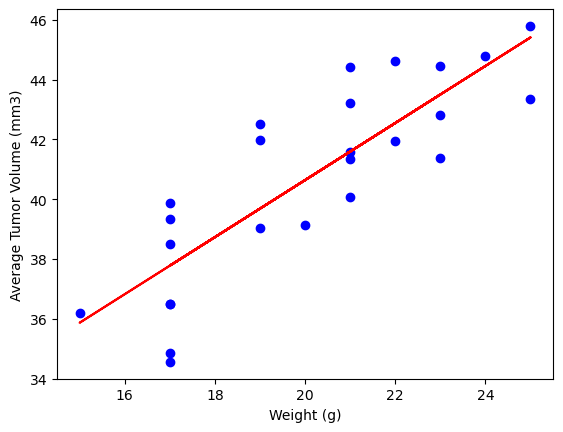

Correlation Coefficient: 0.84


In [71]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create the scatter plot
plt.scatter(weight, average_capomulin_tumor_volume, marker="o", facecolors='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(weight, average_capomulin_tumor_volume)

# Calculate the correlation coefficient
correlation_coefficient = weight.corr(average_capomulin_tumor_volume)

# Add the linear regression line to the plot
plt.plot(weight, intercept + slope * weight, 'r', label='Linear Regression')

plt.show()

# Display correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

In [63]:
# references used
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated
# https://www.includehelp.com/python/tilde-sign-in-pandas-dataframe.aspx (using the Tilde Sign(~)introduced byKourt Bailey)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
# https://saturncloud.io/blog/how-to-use-pandas-to-check-multiple-columns-for-a-condition 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
# https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
# https://pandas.pydata.org/docs/user_guide/groupby.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# https://matplotlib.org/stable/tutorials/pyplot.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html
# https://stackoverflow.com/questions/34087382/matplotlib-center-text-in-its-bbox
# https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
# https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.duplicated.html#pandas.api.extensions.ExtensionArray.duplicated
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html